# Assignment 15: XGBoost and LightGBM

## Dataset: Titanic Survival

**Topics Covered:**
- XGBoost (Extreme Gradient Boosting)
- LightGBM (Light Gradient Boosting Machine)
- Ensemble Methods Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb

# Load data
df = pd.read_csv('datasets/Titanic_train.csv')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,2,Passenger_1,male,78.0,1,0,Ticket_83848,106.0417,C33,S
1,2,0,2,Passenger_2,male,34.0,1,0,Ticket_53629,104.8638,NaN,S
2,3,0,3,Passenger_3,female,51.0,0,0,Ticket_90076,251.5739,C40,S
3,4,0,3,Passenger_4,female,56.0,0,0,Ticket_37109,271.8315,NaN,Q
4,5,1,3,Passenger_5,male,48.0,3,0,Ticket_25181,131.1208,NaN,S


In [2]:
# Preprocess data
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical
df['Sex_encoded'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked_encoded'] = LabelEncoder().fit_transform(df['Embarked'].astype(str))

# Select features
features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
X = df[features]
y = df['Survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training:", len(X_train), "Testing:", len(X_test))

Training: 712 Testing: 179


In [3]:
# XGBoost
print("=== XGBoost ===")

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", round(xgb_acc, 4))

=== XGBoost ===
XGBoost Accuracy: 0.5419


In [4]:
# LightGBM
print("=== LightGBM ===")

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
print("LightGBM Accuracy:", round(lgb_acc, 4))

=== LightGBM ===
LightGBM Accuracy: 0.5363


=== Model Comparison ===
XGBoost: 0.5419
LightGBM: 0.5363


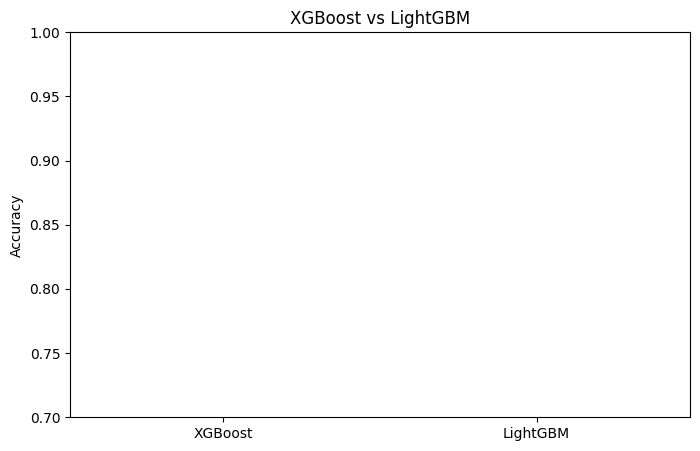

In [5]:
# Compare models
print("=== Model Comparison ===")
print("XGBoost:", round(xgb_acc, 4))
print("LightGBM:", round(lgb_acc, 4))

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'LightGBM'], [xgb_acc, lgb_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('XGBoost vs LightGBM')
plt.ylim(0.7, 1.0)
plt.show()

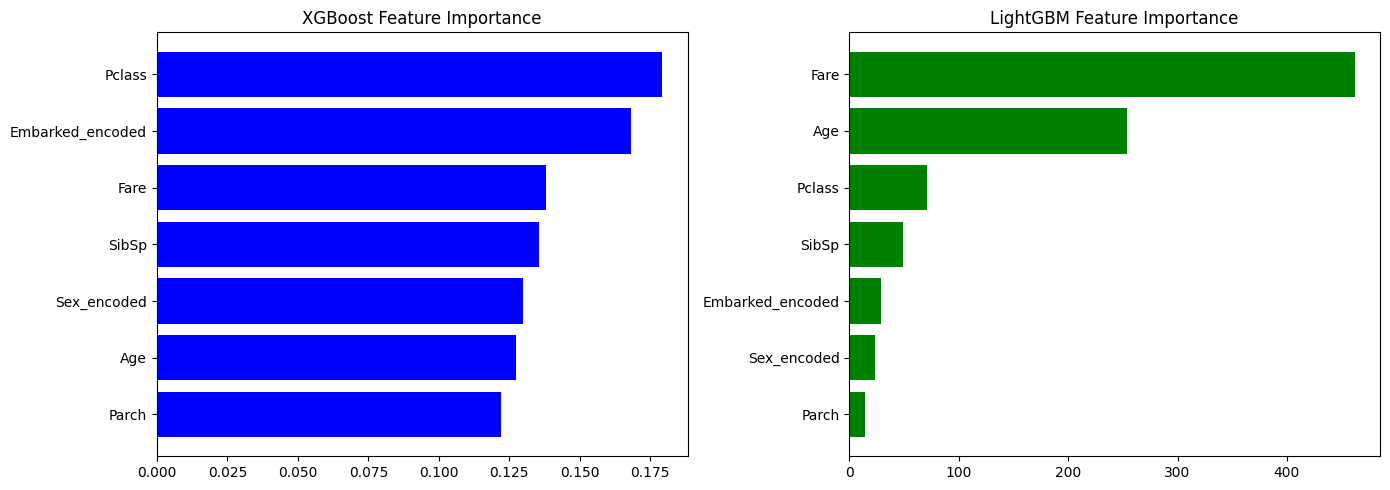

In [6]:
# Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# XGBoost importance
xgb_imp = pd.DataFrame({'Feature': features, 'Importance': xgb_model.feature_importances_})
xgb_imp = xgb_imp.sort_values('Importance')
axes[0].barh(xgb_imp['Feature'], xgb_imp['Importance'], color='blue')
axes[0].set_title('XGBoost Feature Importance')

# LightGBM importance
lgb_imp = pd.DataFrame({'Feature': features, 'Importance': lgb_model.feature_importances_})
lgb_imp = lgb_imp.sort_values('Importance')
axes[1].barh(lgb_imp['Feature'], lgb_imp['Importance'], color='green')
axes[1].set_title('LightGBM Feature Importance')

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [7]:
# Hyperparameter Tuning for XGBoost
from sklearn.model_selection import GridSearchCV

print("=== Hyperparameter Tuning for XGBoost ===")

param_grid_xgb = {"n_estimators": [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
best_xgb_pred = best_xgb.predict(X_test)
best_xgb_acc = accuracy_score(y_test, best_xgb_pred)
print("Tuned XGBoost Accuracy:", round(best_xgb_acc, 4))

=== Hyperparameter Tuning for XGBoost ===
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarni


Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Tuned XGBoost Accuracy: 0.6425


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
# Hyperparameter Tuning for LightGBM
print("\n=== Hyperparameter Tuning for LightGBM ===")

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

grid_search_lgb = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_grid=param_grid_lgb,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search_lgb.fit(X_train, y_train)

print("\nBest parameters for LightGBM:", grid_search_lgb.best_params_)
best_lgb = grid_search_lgb.best_estimator_
best_lgb_pred = best_lgb.predict(X_test)
best_lgb_acc = accuracy_score(y_test, best_lgb_pred)
print("Tuned LightGBM Accuracy:", round(best_lgb_acc, 4))


=== Hyperparameter Tuning for LightGBM ===
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned LightGBM Accuracy: 0.6034


In [9]:
# Comparison of Tuned Models
print("\n=== Tuned Model Comparison ===")
print("Tuned XGBoost:", round(best_xgb_acc, 4))
print("Tuned LightGBM:", round(best_lgb_acc, 4))


=== Tuned Model Comparison ===
Tuned XGBoost: 0.6425
Tuned LightGBM: 0.6034


## Summary

- Both XGBoost and LightGBM are powerful boosting algorithms
- LightGBM is generally faster
- Both provide feature importance rankings